The purpose is to use Monte Carlo Methods to construct an optimum portfolio according to Modern Portfolio Theory 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import yfinance as yf 
yf.pdr_override() 
sns.set()

To build our portfolio, we will focus on stocks from Apple, Walmart, Tesla, General Electric, Amazon and Deutsche Bank on the arbitrary time period from 2013-01-01 to 2018-01-01.

We focus on the adjusted close price of each company and with that, we obtain the daily logarithmic returns:

$$ R_i = log (r_{i}/r_{i-1}) $$

In [3]:
stock =['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')
data = pdr.get_data_yahoo(stock, start=start, end=end)['Adj Close']
complete_data = pdr.get_data_yahoo(stock, start=start, end=end)
daily_returns = (data/data.shift(1))-1
returns = np.log(data/data.shift(1))

[*********************100%***********************]  6 of 6 downloaded
[*********************100%***********************]  6 of 6 downloaded


In [4]:
complete_data.head()

Adj Close                                      Close          \
                AAPL    AMZN     DB     GE   TSLA    WMT   AAPL    AMZN   
Date                                                                      
2013-01-02     69.32  257.31  38.88  16.63  35.36  58.73  78.43  257.31   
2013-01-03     68.44  258.48  38.60  16.44  34.77  58.35  77.44  258.48   
2013-01-04     66.54  259.15  39.21  16.52  34.40  58.57  75.29  259.15   
2013-01-07     66.15  268.46  40.03  16.47  34.34  58.01  74.84  268.46   
2013-01-08     66.32  266.38  40.57  16.29  33.68  58.17  75.04  266.38   

                          ...   Open                          Volume           \
               DB     GE  ...     DB     GE   TSLA    WMT       AAPL     AMZN   
Date                      ...                                                   
2013-01-02  43.36  20.52  ...  43.42  20.68  35.00  68.93  140129500  3271000   
2013-01-03  43.04  20.29  ...  42.95  20.65  35.18  69.25   88241300  2750900   
2013-01-04  43.73  20.38  ...  43.17  20.39  34.80  68.73  148583400  1874200   
2013-01-07  44.64  20.32  ...  44.62  20.35  34.80  68.83  121039100  4910000   
2013-01-08  45.24  20.10  ...  45.49  20.29  34.50  68.28  114676800  3010700   

                                                  
                 DB        GE     TSLA       WMT  
Date                                              
2013-01-02  1515000  47933100  1194800  10390800  
2013-01-03  1489300  50449500   742000   8910100  
2013-01-04   732200  30994700   674000   6438000  
2013-01-07  1723600  34056600   442000   6201400  
2013-01-08  1607800  41647300  1284000   5866900  

[5 rows x 36 columns]

In [5]:
data.head() # Just the Ajd. Closed columns 

,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-01-02,69.32,257.31,38.88,16.63,35.36,58.73
2013-01-03,68.44,258.48,38.60,16.44,34.77,58.35
2013-01-04,66.54,259.15,39.21,16.52,34.40,58.57
2013-01-07,66.15,268.46,40.03,16.47,34.34,58.01
2013-01-08,66.32,266.38,40.57,16.29,33.68,58.17


In [6]:
returns.head() # The log returns

,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012776,0.004537,-0.007228,-0.011491,-0.016826,-0.006491
2013-01-04,-0.028154,0.002589,0.015680,0.004854,-0.010698,0.003763
2013-01-07,-0.005878,0.035295,0.020697,-0.003031,-0.001746,-0.009607
2013-01-08,0.002567,-0.007778,0.013400,-0.010989,-0.019407,0.002754


In [7]:
# data.to_csv('DATA.cvs') If we want to save the data

Some basic visualization of our data:

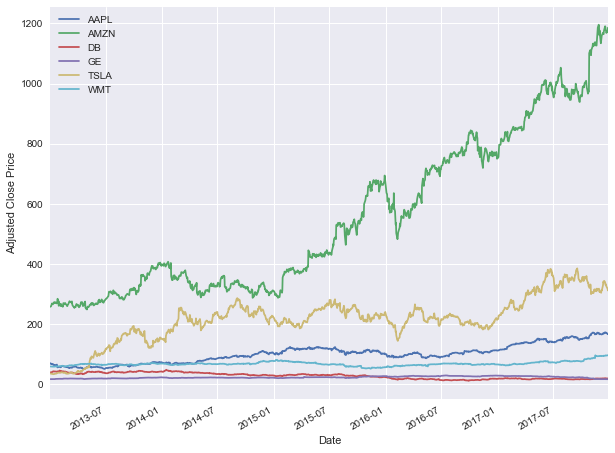

In [7]:
data.plot(figsize=(10,8))
plt.ylabel('Adjusted Close Price')
plt.show()

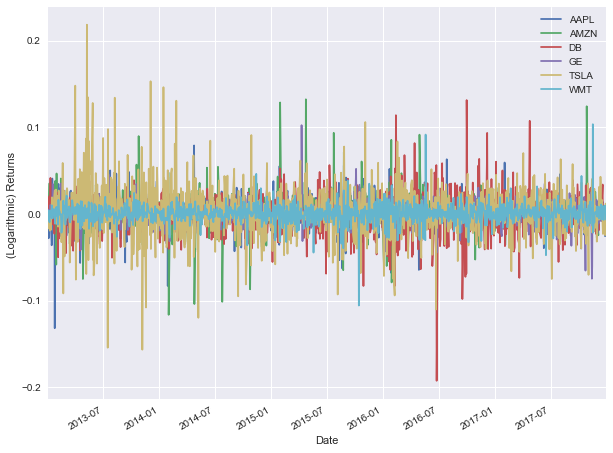

In [8]:
returns.plot(figsize=(10,8))
plt.ylabel('(Logarithmic) Returns ')
plt.show()

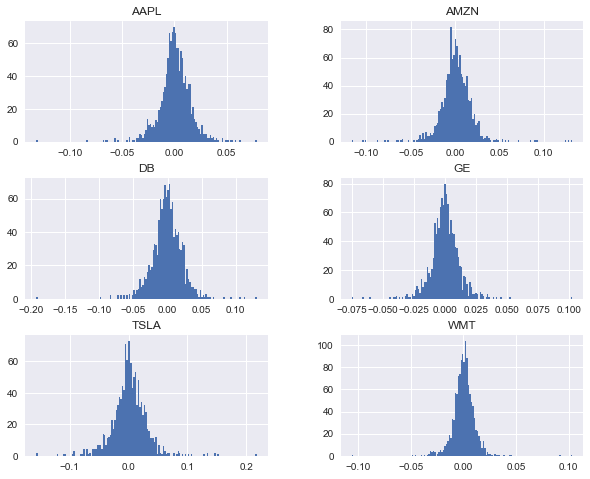

In [9]:
returns.hist(figsize=(10,8), bins = (150))
#plt.ylabel('(Logarithmic) Returns ')
plt.show()

We obtain the annualized return of each company by computing the mean and using $ \mu^{Annual} = 252\, \mu$, where 252 is the number or trading days by year. Similarly, we compute the anualized covariance matrix as $ \sigma_{ij}^{Annual}=252\,\sigma_{ij}$.

In [10]:
print('Annualized Returns')
print(returns.mean()*252)
print('\n')
print('Anualized Covariance Matrix')
print(returns.cov()*252)

Annualized Returns
AAPL    0.174179
AMZN    0.303286
DB     -0.148670
GE     -0.004261
TSLA    0.435759
WMT     0.097264
dtype: float64


Anualized Covariance Matrix
          AAPL      AMZN        DB        GE      TSLA       WMT
AAPL  0.057297  0.017842  0.018580  0.010822  0.020289  0.007258
AMZN  0.017842  0.083572  0.024558  0.012937  0.037953  0.007376
DB    0.018580  0.024558  0.121898  0.023961  0.026227  0.011217
GE    0.010822  0.012937  0.023961  0.034114  0.015391  0.007461
TSLA  0.020289  0.037953  0.026227  0.015391  0.219997  0.008840
WMT   0.007258  0.007376  0.011217  0.007461  0.008840  0.029094


We also check the correlations between returns. We observe that there is no significant correlation.

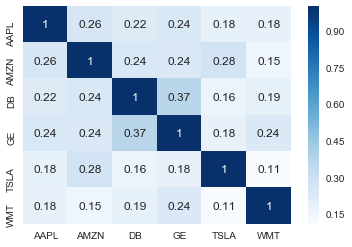

In [11]:
sns.heatmap(returns.corr(), cmap= 'Blues', annot=True)

# ========================================

We start building the portfolio. We begin defining a function that produces random weights $W_{i}$. Clearly, we ask that $\sum W_{i} = 1$, where the index $i$ refers to the different companies that compose our portfolio.

In [12]:
def initialize_weights():
    weights = np.random.random(len(stock))
    weights /= np.sum(weights)
    return weights;

We compute the portfolio annualized return as $\mu_{P}^{Annual} =  \sum W_{i} \mu_{i}^{Annual} $.

In [13]:
def  calculate_portfolio_returns(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print('Expected Portfolio Return:',  portfolio_return)

And similarly, we compute the portfolio yearly standar deviation as $\sigma_{P}^{Annual} =\sqrt{ \sum_{ij} W_{i}W_{j}\sigma{ij}^{Annual}}$

In [14]:
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    print('Expected Variance:', portfolio_variance)

In [15]:
weights = initialize_weights()
weights.round(3)

array([0.139, 0.133, 0.102, 0.229, 0.112, 0.284])

In [16]:
calculate_portfolio_returns(returns,weights)

Expected Portfolio Return: 0.12489797997290798


In [17]:
calculate_portfolio_variance(returns,weights)

Expected Variance: 0.14733590431083976


# =====================================

We now use Monte Carlo to generate 50,000 different, random weights $W_{i}$. This will give us the same number of different portfolio allocations.

In [18]:
num_weights = 50000

def generate_portfolios(weights, returns):
    
    preturns = []
    pvariances = []
    
    # Monte Carlo simulation: We generate several randon weights and their correspondig portfolios
    
    for i in range(num_weights):
        weights = np.random.random(len(stock))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
        
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances
    

For the computation of the Sharpe ratio, we set the risk free return to 0.014, which is the 3 Month Treasury Bill Rate by 2018-10-10

In [19]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances, returns, c = (returns-0.014)/variances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.show()

In [20]:
monte_carlo_portfolios = generate_portfolios(weights, returns)
preturns = monte_carlo_portfolios[0]
pvariances = monte_carlo_portfolios[1]

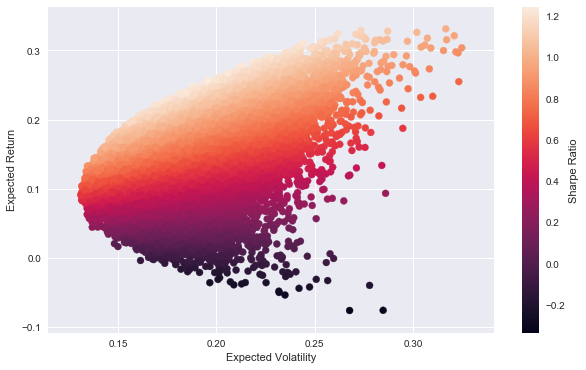

In [21]:
plot_portfolios(preturns, pvariances)

We note that the color scale correspond to the value of the Sharpe ratio of each portfolio radomnly generated. The lighter the color, the higher the value of the Sharpe ratio.

# =================================================

We now find the optimal porfolio. To do this, we use SciPy's optimization algorithms.

In [34]:
import scipy.optimize as optimization

In [35]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, (portfolio_return-0.014)/portfolio_volatility])

Our optimization problem consists of maximizing the Sharpe ratio.

In [36]:
def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

This is our optimization algorithm. Here we include the constrains on the weights: the sum of weights is equal to 1. Any weight seed will lead us to the optimum portfolio allocation. To optimize, we use the Sequential Least Squares Programming method. 

In [37]:
# f(x) = 0 is the function to minimize.

def optimize_portfolio(weights, returns):
    constraints = ({'type': 'eq','fun': lambda x: np.sum(x)-1} ) # The sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stock))) # Individual weights can at most be 1: I invest everything in 1 stock
    optimum = optimization.minimize(fun = min_func_sharpe, x0 = weights, args = returns, method = 'SLSQP', bounds = bounds, constraints=constraints)
    return optimum

In [38]:
optimum = optimize_portfolio(initialize_weights(),returns)

In [39]:
print(optimum['x'].round(3))

[0.208 0.368 0.    0.    0.197 0.227]


In [40]:
optimum['x'].sum()

1.0000000000000002

In [41]:
print(statistics(optimum['x'], returns).round(3))

[0.256 0.191 1.266]


# ===================================

In [42]:
# Optimal portfolio according to weights. 
def print_optimal_portfolio(optimum, returns):
    print('\n')  
    for i in range(len(stock)):
        print('- Optimal Weight for {} is: {}'.format(stock[i], optimum['x'][i].round(3)))
    print('\n')    
    print('**********************************************')
    print('\n')  
    print('Optimal Weights: ', optimum['x'].round(3))
    print('Expected return, volatility and Sharpe Ratio: ', statistics(optimum['x'], returns).round(3))

In [43]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], markersize = 2.0)
    plt.scatter(pvariances, preturns, c = (preturns-0.014)/pvariances, marker = 'o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.scatter(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], c = 'b' )
    #plt.plot(x = statistics(optimum['x'], returns)[1],y = statistics(optimum['x'], returns)[0], color = 'r',markersize = 200.0)
    plt.show()

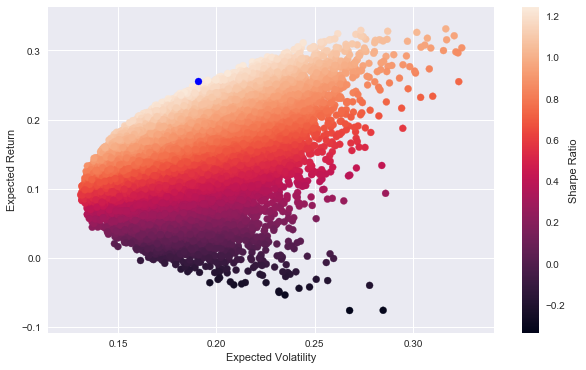

In [44]:
show_optimal_portfolio(optimum, returns, preturns, pvariances)

Our optimal portfolio is shown in the blue spot.

In [45]:
 print_optimal_portfolio(optimum, returns)



- Optimal Weight for AAPL is: 0.208
- Optimal Weight for WMT is: 0.368
- Optimal Weight for TSLA is: 0.0
- Optimal Weight for GE is: 0.0
- Optimal Weight for AMZN is: 0.197
- Optimal Weight for DB is: 0.227


**********************************************


Optimal Weights:  [0.208 0.368 0.    0.    0.197 0.227]
Expected return, volatility and Sharpe Ratio:  [0.256 0.191 1.266]


# =====================================